In [114]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [71]:
df_train=pd.read_excel("Flight-data_Train.xlsx")
df_test=pd.read_excel("Flight-data_Test.xlsx")

In [72]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [73]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [74]:
#lets add source column to train and test dataset
df_train["source"] = "train"
df_test["source"] = "test"

In [75]:
#lets combine both the datasets
df = pd.concat([df_train,df_test],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [76]:
#Lets chcek the null values in the dataset
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [77]:
#Lets chcek the datatypes of the columns
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
dtype: object


We can see that Date_of_Journy , De_Time and Arrival_Time contains dates and time but their data type is object, lets convert it to datatime

In [78]:
#lets convert data type to datetime
df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Date_of_Journey'])

In [79]:
#Check the data types again
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
source                     object
dtype: object

In [80]:
#Lets fill the null values 
#As these are categorical columns so I will replace null values with mode of that column
df['Route'].fillna(df['Route'].mode().iloc[0], inplace = True)
df['Total_Stops'].fillna(df['Total_Stops'].mode().iloc[0], inplace = True)

In [81]:
#Lets create new columns using Date_of_Journey column, whith day, month and year separately
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df["Journey_year"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year
df.drop(columns = "Date_of_Journey", inplace = True)

In [82]:
#Getting Duration column using Arrival_Time and Dep_Time
x = (df["Arrival_Time"]-df["Dep_Time"])
duration_list = list()
for i in range(len(x)):
    dur = x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"] = duration_list

In [83]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Dep_time"] = df["Dep_hour"] + df["Dep_min"]/60

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [84]:

#lets drop Arrival_Time column
df.drop(columns = "Arrival_Time", inplace = True)

In [85]:
df.drop(columns = ['Dep_hour','Dep_min'], inplace = True)

In [86]:
#Lets check the value counts from Journey_year column
df['Journey_year'].value_counts()

2019    13354
Name: Journey_year, dtype: int64

In [87]:
#We can see all the data is from same year so we will delete year column.

df.drop(columns = 'Journey_year', inplace = True)

In [88]:

#lets check the data after updation
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,1.666667,non-stop,No info,3897.0,train,24,3,22.333333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,18.166667,2 stops,No info,7662.0,train,5,1,5.833333
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,14.583333,2 stops,No info,13882.0,train,6,9,9.416667
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.916667,1 stop,No info,6218.0,train,5,12,18.083333
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,7.166667,1 stop,No info,13302.0,train,3,1,16.833333


In [89]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration           float64
Total_Stops         object
Additional_Info     object
Price              float64
source              object
Journey_day          int64
Journey_month        int64
Dep_time           float64
dtype: object

In [90]:
#Lets chcek the value counts of each categorical column
cat_columns = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for col in df[cat_columns]:
    if df[col].dtype=="object":
        print('--------------------------------------')
        print(df[col].value_counts())
        print()

--------------------------------------
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

--------------------------------------
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

--------------------------------------
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

--------------------------------------
DEL → BOM → COK                3001
BLR → DEL            

->By checking the value counts of every categorical column we will do some modifications

->In column Additional_Info We will combine 1 Long layover and 2 Long layover with Long layover

->And No Info with No info

In [91]:
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

In [92]:
#In column Airline we will combine Jet Airways Business with Jet Airways.
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

#Multiple carriers Premium economy with Multiple carriers.
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

#Vistara Premium economy with Vistara
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

#In Destination column "New Delhi" can be replaced by "Delhi"
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [93]:
#Lets again chcek the value counts
for col in df[cat_columns]:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print('-------------------------------------------')

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64
-------------------------------------------
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
-------------------------------------------
Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
-------------------------------------------
DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → UDR → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
CCU → VTZ → BLR                   1
BOM → NDC → HYD                   1
CCU → IXA → 

In [94]:
#lets check total stops
df["Total_Stops"].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [95]:
# As this is case of Ordinal Categorical type 
# we will assign values to corresponding keys
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [96]:
# Check data 
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,IndiGo,Banglore,Delhi,BLR → DEL,1.666667,0,No info,3897.0,train,24,3,22.333333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,18.166667,2,No info,7662.0,train,5,1,5.833333
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,14.583333,2,No info,13882.0,train,6,9,9.416667
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.916667,1,No info,6218.0,train,5,12,18.083333
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,7.166667,1,No info,13302.0,train,3,1,16.833333


# EDA

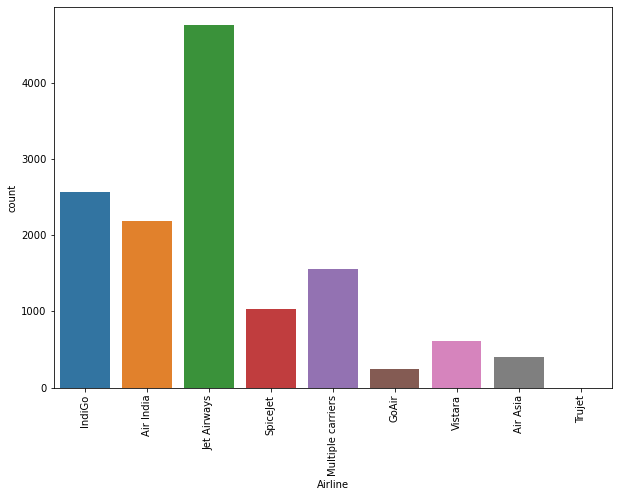

In [97]:
#Airline
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sn.countplot("Airline", data=df)

jet Airways carry maximum number of flight while Vistara premium economy, jet Airways buisness, multiple carriers premium ecconomy and Trujet carry least flight.

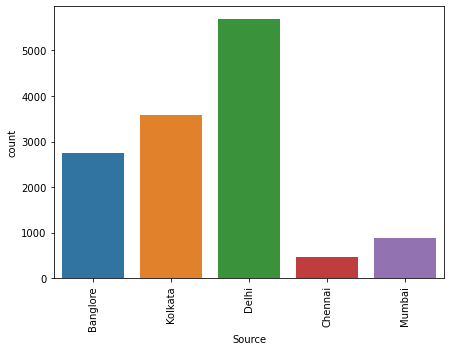

In [98]:
#Source
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sn.countplot("Source", data=df)

Majority of the flight takeoff from delhi.
Chennai sees least takeoff.

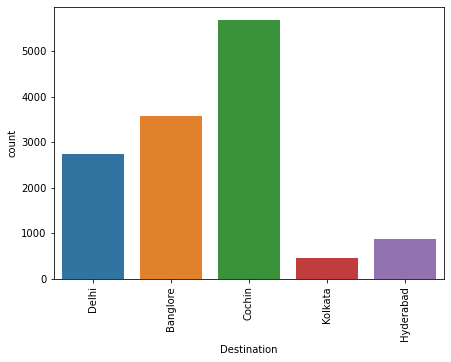

In [99]:
#Destination
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sn.countplot("Destination", data=df)

Coachin recieves maximum number of flights. Kolkata recieves less.

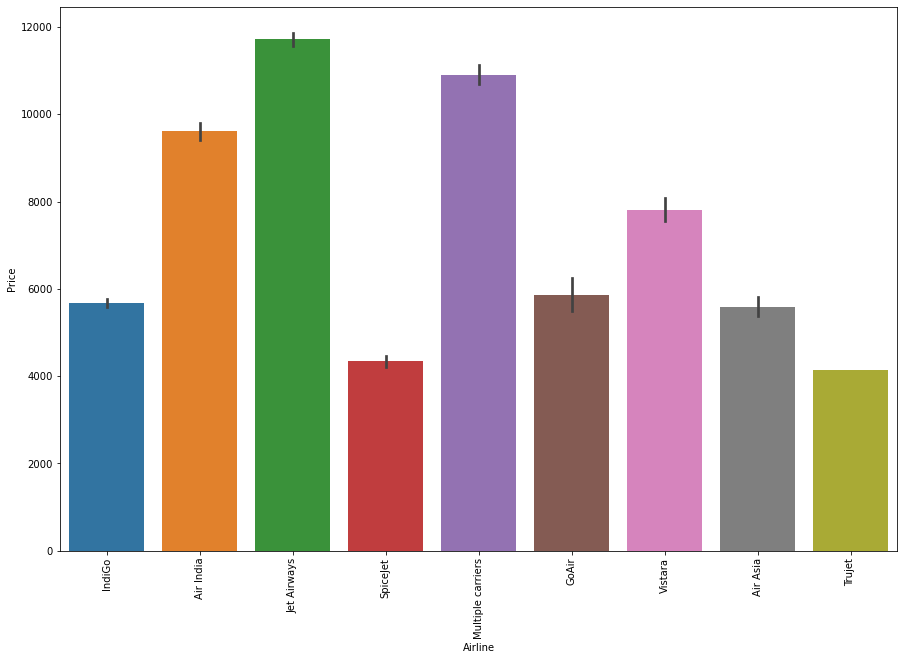

In [100]:
plt.figure(figsize=(15,10))
sn.barplot(x="Airline",y="Price",data=df)
plt.xticks(rotation=90)
plt.show()

The flights of jet-airways buisness is low, there prices are the highest among the other airlines. Trujet has the lowest price in all.

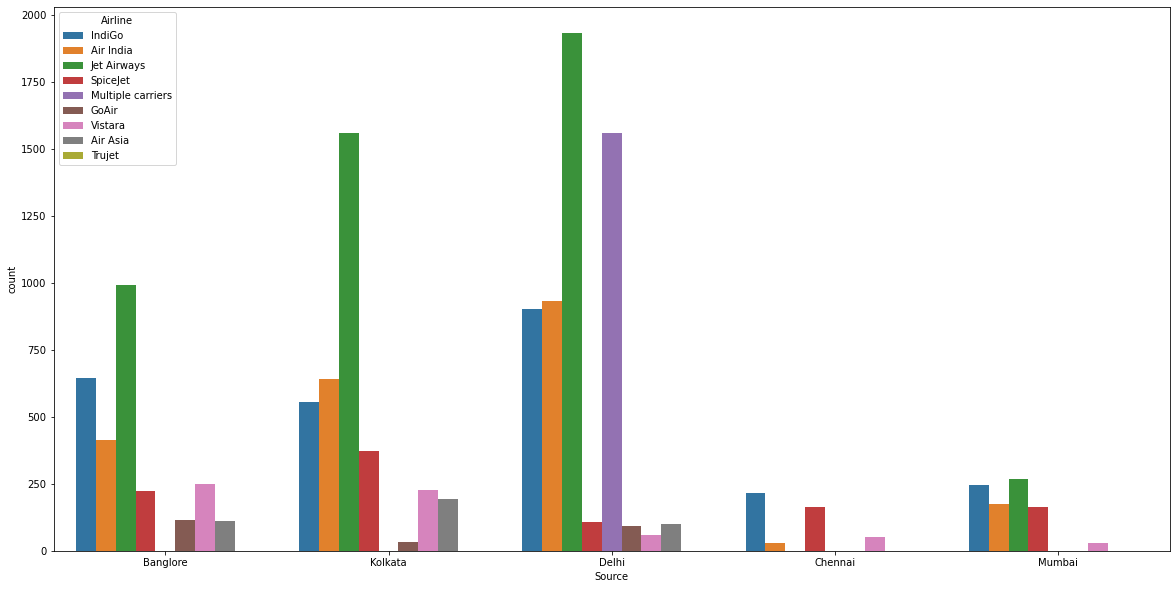

In [101]:
plt.figure(figsize=(20,10))
sn.countplot(x="Source",hue="Airline",data=df)
plt.show()

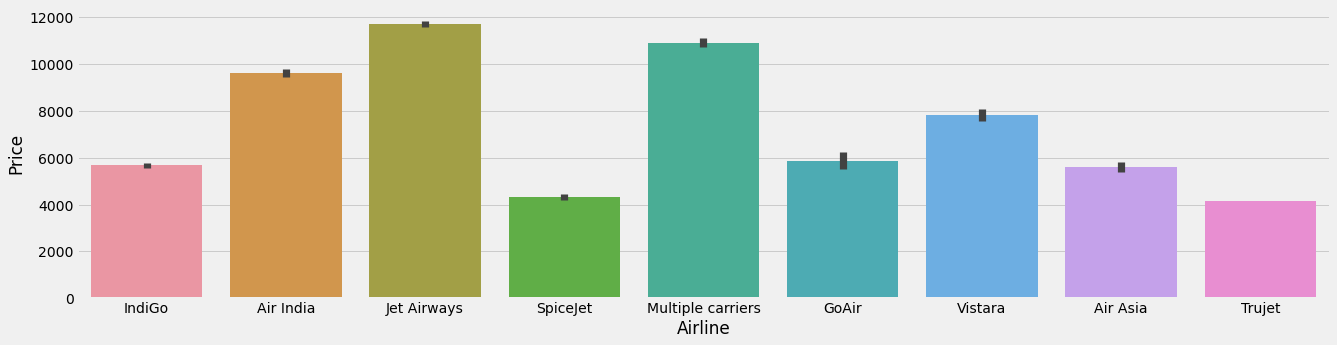

In [107]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(20,5))
sn.barplot(x = "Airline", y = "Price", data=df)
plt.show()

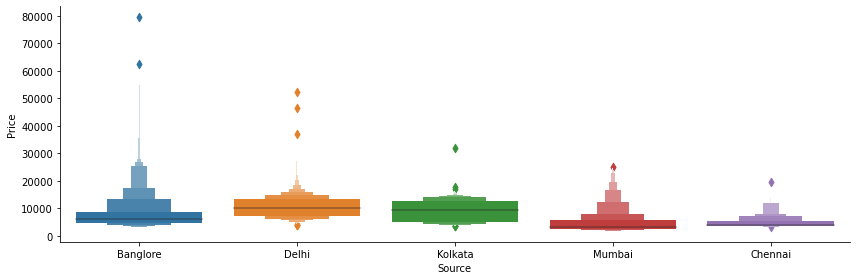

In [102]:
sn.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

The plane which take offs from banglore has highest fare. The plaNe which take offs from chennai has lowest fare.

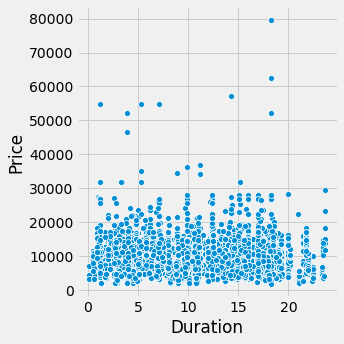

In [108]:
#lets check the relation between Duration and price
sn.relplot(x = 'Duration', y = 'Price', data = df)
plt.show()

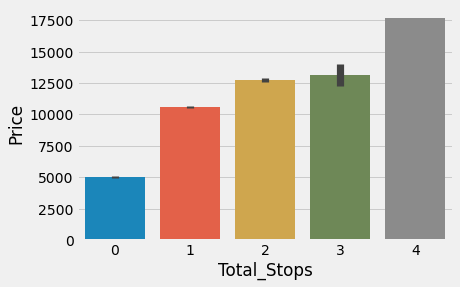

In [109]:
#lets plot barplot for total stops vs price
sn.barplot(x = 'Total_Stops', y = 'Price', data = df)
plt.show()

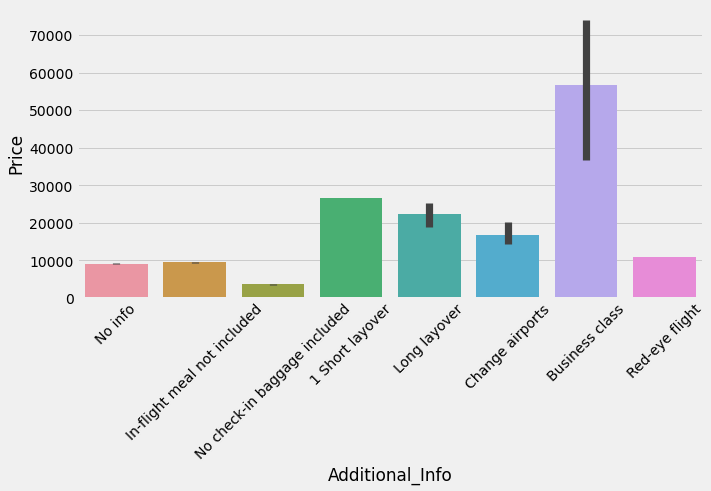

In [110]:
#lets see how Additional_Info affects flight price.
plt.figure(figsize = (10,5))
sn.barplot(x = 'Additional_Info', y = 'Price', data = df)
plt.xticks(rotation = 45)
plt.show()

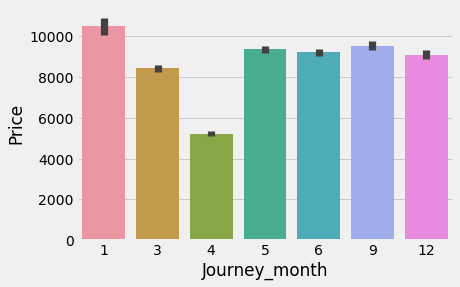

In [111]:
#Lets see how Journy month affects the flight price
sn.barplot(x = 'Journey_month', y = 'Price', data = df)
plt.show()

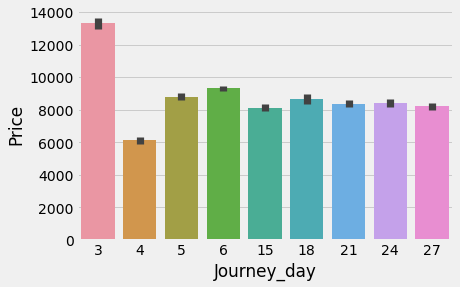

In [112]:
#Lets see how Journy day affects the flight price
sn.barplot(x = 'Journey_day', y = 'Price', data = df)
plt.show()

# Statistical Analysis

In [113]:
#lets check the description
df.describe()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_time
count,13354.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.000000
mean,11.078291,0.826045,9087.064121,12.551146,5.549274,12.921709
std,5.736488,0.674608,4611.359167,8.759967,2.998690,5.736488
min,0.083333,0.000000,1759.000000,3.000000,1.000000,0.333333
25%,5.916667,0.000000,5277.000000,5.000000,3.000000,8.000000
50%,12.083333,1.000000,8372.000000,6.000000,5.000000,11.916667
75%,16.000000,1.000000,12373.000000,21.000000,6.000000,18.083333
max,23.666667,4.000000,79512.000000,27.000000,12.000000,23.916667


# Encoding

In [115]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [116]:
#lets have a look on data after encoding
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,1.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,1.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,1.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,1.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,1.0,3,1,16.833333


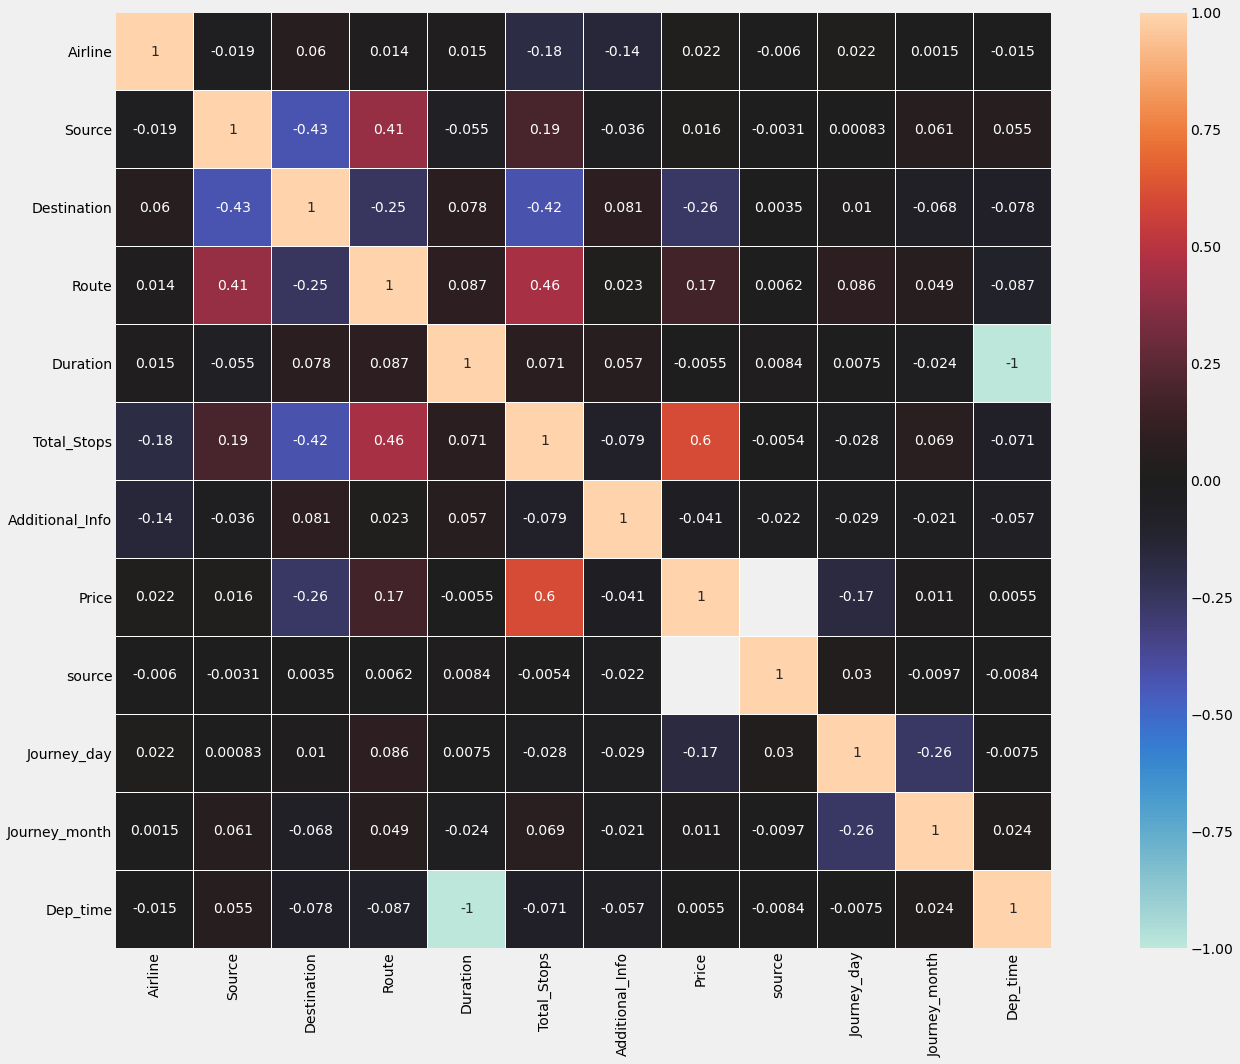

In [117]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sn.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()


->By looking at the heat map we can say Total_stops has maximum correlation with price.

->Column Dep_Time and Duration are strongly and negatively related to each other.

# Checking Outliers

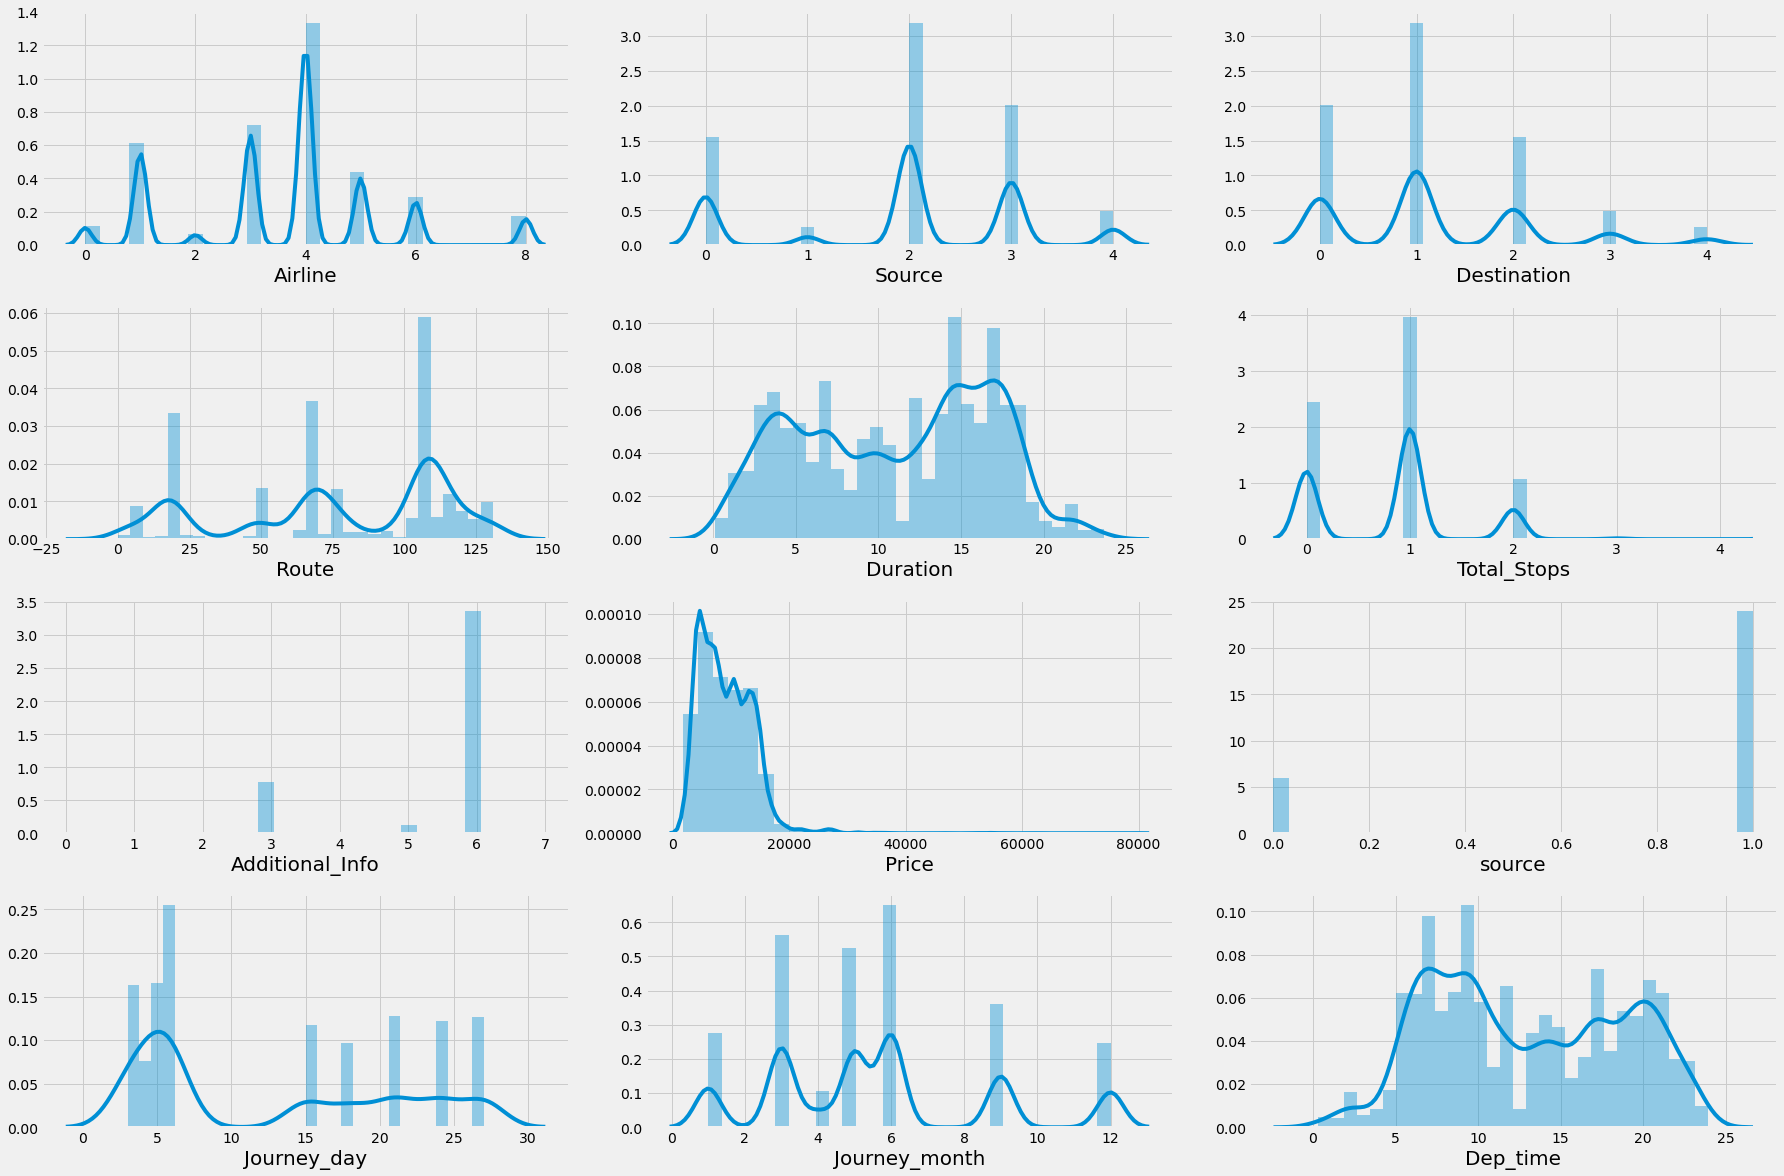

In [118]:
#Lets have a look on distribution of our data
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(5,3,plotnumber)
        sn.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

By looking at the above distribution plots we can see skewness in many columns, but these are categorical data , we can remove outliers from Duration and Dep_time as these are derived from datetime types

In [119]:
#lets check the skewness
df.skew()

Airline            0.134301
Source            -0.424151
Destination        0.837084
Route             -0.521448
Duration          -0.121972
Total_Stops        0.317797
Additional_Info   -1.579064
Price              1.812552
source            -1.500051
Journey_day        0.389526
Journey_month      0.621749
Dep_time           0.121972
dtype: float64

In [120]:
# At first we will remove outliers from our data. thereafter again will check skewness
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Duration","Dep_time"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [121]:
#lets check the shape after removal of outliers
df.shape

(13354, 13)

In [122]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [123]:
df.skew()

Airline            0.134301
Source            -0.424151
Destination        0.837084
Route             -0.521448
Duration          -0.121972
Total_Stops        0.317797
Additional_Info   -1.579064
Price              1.812552
source            -1.500051
Journey_day        0.389526
Journey_month      0.621749
Dep_time           0.121972
dtype: float64

# Spliting Train and Test Data

In [124]:
#Divide into test and train:
df_train = df.loc[df['source']== 1]
df_test = df.loc[df['source']== 0]
#test.reset_index(drop=True,inplace=True)

In [125]:
#lets have a look at our training data set
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,1.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,1.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,1.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,1.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,1.0,3,1,16.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,67.0,4.083333,0,6.0,4107.0,1.0,4,9,19.916667
10679,1.0,3.0,0.0,67.0,3.250000,0,6.0,4145.0,1.0,27,4,20.750000
10680,4.0,0.0,2.0,18.0,15.666667,0,6.0,7229.0,1.0,27,4,8.333333
10681,8.0,0.0,2.0,18.0,12.500000,0,6.0,12648.0,1.0,3,1,11.500000


In [126]:
#CHeck testing data
df_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
10683,4.0,2.0,1.0,108.0,6.500000,1,6.0,NaN,0.0,6,6,17.500000
10684,3.0,3.0,0.0,94.0,17.666667,1,6.0,NaN,0.0,5,12,6.333333
10685,4.0,2.0,1.0,108.0,4.750000,1,3.0,NaN,0.0,21,5,19.250000
10686,5.0,2.0,1.0,108.0,16.000000,1,6.0,NaN,0.0,21,5,8.000000
10687,0.0,0.0,2.0,18.0,0.083333,0,6.0,NaN,0.0,24,6,23.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.0,3.0,0.0,76.0,3.500000,1,6.0,NaN,0.0,6,6,20.500000
13350,3.0,3.0,0.0,67.0,9.666667,0,6.0,NaN,0.0,27,3,14.333333
13351,4.0,2.0,1.0,108.0,2.166667,1,6.0,NaN,0.0,3,6,21.833333
13352,1.0,2.0,1.0,108.0,20.000000,1,6.0,NaN,0.0,3,6,4.000000


In [127]:
#lets drop source column from dataset
df.drop(columns = ["source"], axis =1, inplace = True)

In [128]:
#Lets drop Price column from test as it is the o/p variable that needs to be predicted
df_test.drop(columns=["Price"],inplace=True)

In [129]:
#drop source column from train and test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [130]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,3,1,16.833333


# Spliting Data into Input and Output Variable

In [131]:
#lets saperate data into label and features
x = df_train.drop(columns = 'Price')
y = df_train["Price"]

In [132]:
#check features
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,3,1,16.833333


# Importing Necessary Libraries

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Finding Best randomstate

In [135]:
#to find random stat which gives maximum r2_score

max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.43676576401498224 on Random State 1


In [136]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 1)

# Model Building 

MAE : 2499.8196481043337
RMSE : 3509.241319218368
------------------------------
Training r2 Score : 43.2699582512223 %
Testing r2 Score: 43.381670837215225 %
------------------------------

Cross validation score : 43.50046125299375

Accuracy Score - Cross Validation Score : -0.11879041577852689


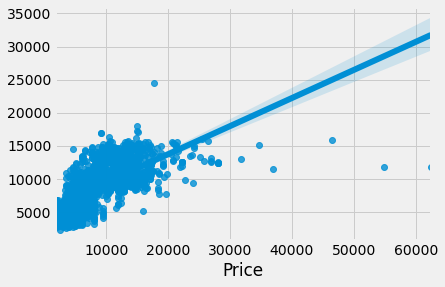

In [137]:
#Model with LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

r2score = r2_score(y_test,pred_lr)*100

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(lr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sn.regplot(y_test,pred_lr)
plt.show()

# DecisionTreeRegressor Model

MAE : 827.5334318339841
RMSE : 2097.221568318978
------------------------------
Training r2 Score : 97.28145099376324 %
Testing r2 Score: 79.77822791207714 %
------------------------------

Cross validation score : 83.19626890899589

Accuracy Score - Cross Validation Score : -3.418040996918748


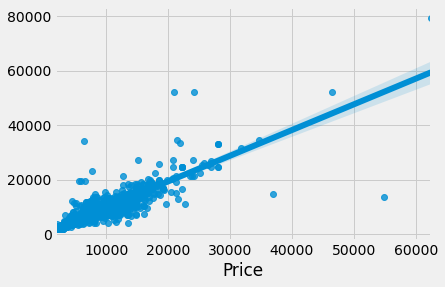

In [138]:
#Model with DecesionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

r2score = r2_score(y_test,pred_dt)*100

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(dt, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sn.regplot(y_test,pred_dt)
plt.show()

# RandomForestRegressor Model

MAE : 750.6948221323646
RMSE : 1653.5177302326101
------------------------------
Training r2 Score : 96.08858419455825 %
Testing r2 Score: 87.42962329711015 %
------------------------------

Cross validation score : 87.64741064504402

Accuracy Score - Cross Validation Score : -0.21778734793386434


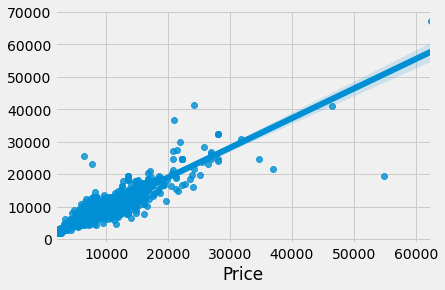

In [139]:
#Model with RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

r2score = r2_score(y_test,pred_rf)*100

#evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(rf, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sn.regplot(y_test,pred_rf)
plt.show()

# KNeighborsRegressor Model

MAE : 1695.7488581055784
RMSE : 2722.7742611066687
------------------------------
Training r2 Score : 77.92080276449548 %
Testing r2 Score: 65.91574126634276 %
------------------------------

Cross validation score : 67.13089506978675

Accuracy Score - Cross Validation Score : -1.2151538034439824


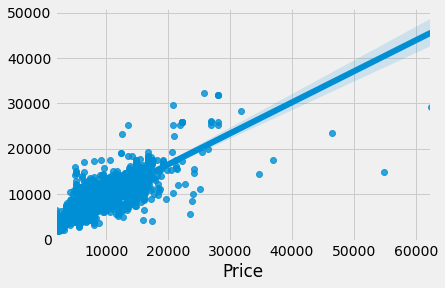

In [140]:
#Model with KNeighborsRegressor

knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

r2score = r2_score(y_test,pred_knr)*100

#evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(knr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sn.regplot(y_test,pred_knr)
plt.show()

# XGBRegressor Model

MAE : 784.5907380487178
RMSE : 1600.3481711168859
------------------------------
Training r2 Score : 94.92217403640676 %
Testing r2 Score: 88.22503740633914 %
------------------------------

Cross validation score : 88.50136859943431

Accuracy Score - Cross Validation Score : -0.2763311930951744


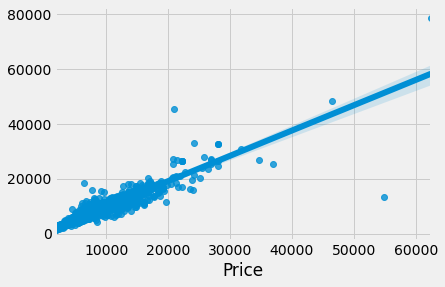

In [142]:
#lets check with XGBRegressor model

xgb = XGBRegressor(verbosity = 0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

r2score = r2_score(y_test,pred_xgb)*100

#evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(xgb, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sn.regplot(y_test,pred_xgb)
plt.show()

RandomForestRegressor algorithm is giving least difference in r2score and cv score, hence I am selecting it for hyperparameter tuning as best suitable algorithm.

# Hyperparameter Tuning

In [143]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [12,15,20,22],
                'n_estimators':[800,900,1000,1200],
                'min_samples_split': [2]
                }

In [144]:

#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 15, 20, 22],
                         'min_samples_split': [2],
                         'n_estimators': [800, 900, 1000, 1200]})

In [145]:
#the best parameters found by GridSearchCV
GCV.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 1000}

In [146]:
#lets train and test our final model with best parameters
model = RandomForestRegressor(max_depth = 15, min_samples_split = 2, n_estimators = 1000)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 737.5763771786068
RMSE : 1592.9448841987758
------------------------------
 
r2 Score: 88.33372849480037 %


# Lets see final Actual Vs Predicted sample.

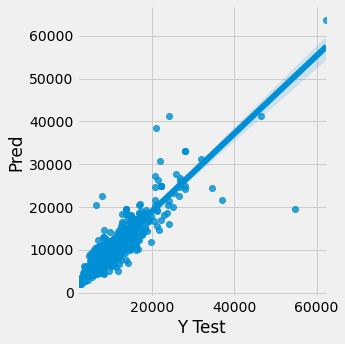

In [147]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sn.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

# Predicting flight price for test dataset 

In [148]:
#lets predict the price with our best model
prediction = model.predict(df_test)

In [150]:
#lets make the dataframe for prediction
flight_price = pd.DataFrame(pred, columns=["Price"])

In [151]:
flight_price

,Price
0,2009.197000
1,5424.471917
2,14470.704351
3,19454.607821
4,10273.497273
...,...
2666,14488.617814
2667,10207.053155
2668,5660.434000
2669,4000.445326


In [152]:
#Lets save the submission to csv
flight_price.to_csv("Flight_Price_Predictions.csv",index=False)

# Saving the final Model

In [153]:
import joblib
joblib.dump(model,"FlightPrice_Prediction.pkl")

['FlightPrice_Prediction.pkl']